<a href="https://colab.research.google.com/github/shaqshree/Stock_marker_price_prediction/blob/main/Stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset=pd.read_csv("/content/1729258-1613615-Stock_Price_data_set_(1).csv")

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
dataset.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


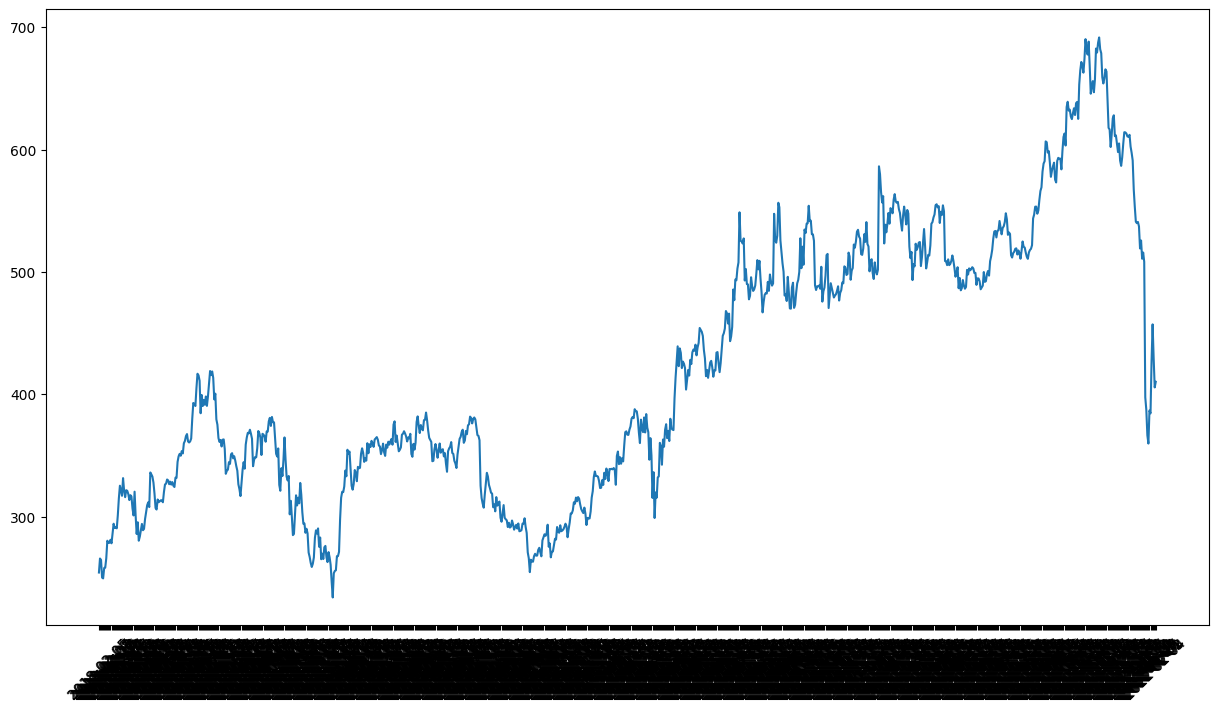

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(dataset['Date'], dataset['Adj Close'])
plt.xticks(rotation=45)
plt.show()


In [ ]:
close_prices=dataset['Adj Close'].values.reshape(-1,1)

In [ ]:
train_ratio = 0.8
train_len = int(close_prices.shape[0]*train_ratio)

In [ ]:
scalar = StandardScaler()
scalar.fit(close_prices[:train_len])
scaled_data = scalar.transform(close_prices).flatten()

In [ ]:
T=10
D=1
X=[]
Y=[]

In [ ]:
for t in range(len(scaled_data) - T):
    x = scaled_data[t:t+T]
    X.append(x)
    y = scaled_data[t+T]
    Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = int(len(X)*train_ratio)
print(f'X shape = {X.shape}\nY shape = {Y.shape}')

X shape = (999, 10, 1)
Y shape = (999,)


In [ ]:
i = Input(shape=(T, 1))
x = LSTM(100)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
            loss = 'mse',
            optimizer=Adam(learning_rate=0.01))
r = model.fit(X[:N], Y[:N],
             epochs=80,
             validation_data=(X[N:], Y[N:]))

Epoch 1/80
25/25 [==============================] - 8s 33ms/step - loss: 0.0855 - val_loss: 0.2101
Epoch 2/80
25/25 [==============================] - 0s 8ms/step - loss: 0.0315 - val_loss: 0.2803
Epoch 3/80
25/25 [==============================] - 0s 8ms/step - loss: 0.0250 - val_loss: 0.3725
Epoch 4/80
25/25 [==============================] - 0s 7ms/step - loss: 0.0217 - val_loss: 0.0912
Epoch 5/80
25/25 [==============================] - 0s 9ms/step - loss: 0.0192 - val_loss: 0.0993
Epoch 6/80
25/25 [==============================] - 0s 8ms/step - loss: 0.0177 - val_loss: 0.0869
Epoch 7/80
25/25 [==============================] - 0s 7ms/step - loss: 0.0176 - val_loss: 0.0905
Epoch 8/80
25/25 [==============================] - 0s 5ms/step - loss: 0.0170 - val_loss: 0.0757
Epoch 9/80
25/25 [==============================] - 0s 6ms/step - loss: 0.0167 - val_loss: 0.1009
Epoch 10/80
25/25 [==============================] - 0s 5ms/step - loss: 0.0176 - val_loss: 0.1192
Epoch 11/80
25/25 

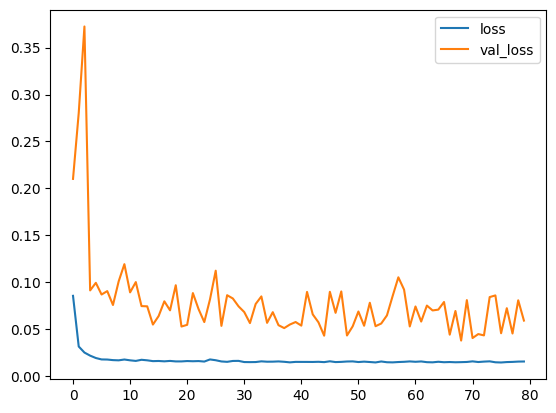

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step
(999, 1)


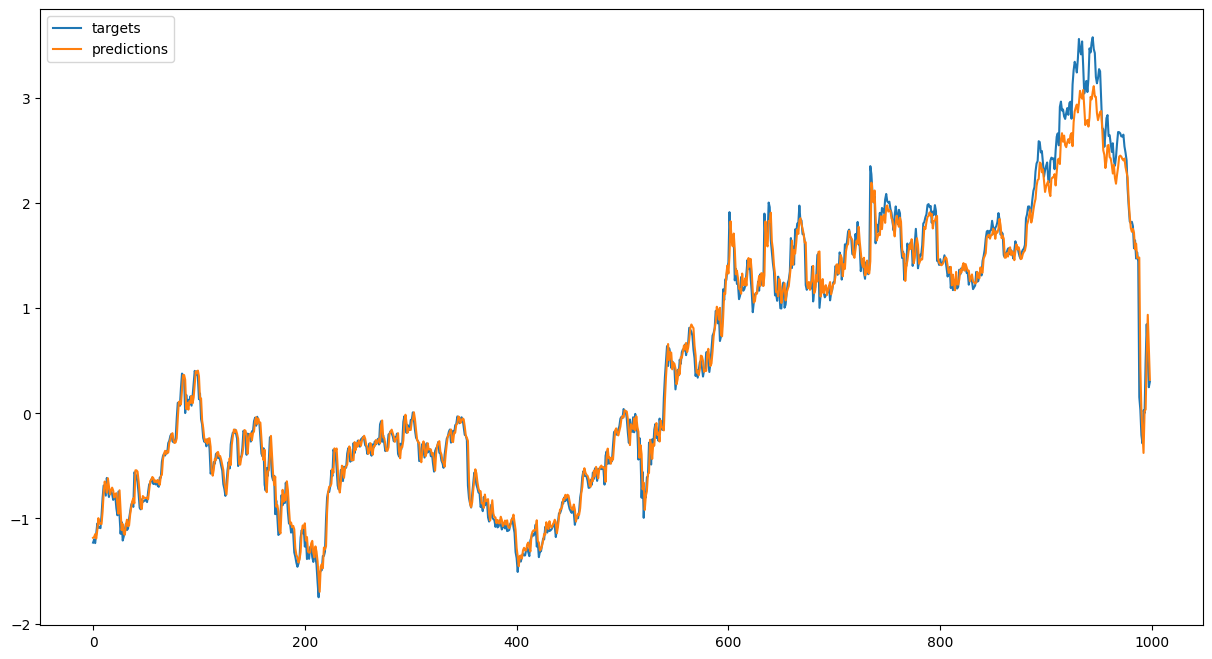

In [ ]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.figure(figsize=(15,8))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()